# Single Systems Notebook

## Vectors and matrices in Python


In [3]:
from numpy import array

ket0 = array([1,0])
ket1 = array([0,1])

display(ket0/2 + ket1/2)

array([0.5, 0.5])

We can also use array to create matrices that represent operations.

In [4]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the matmul function from NumPy :

In [5]:
from numpy import matmul

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

## States, measurements, and operations

### Defining and displaying state vectors


Qiskit's `Statevector` class provides functionality for defining and manipulating quantum state vectors. The following code cell imports the `Statevector` class and defines a few vectors using it. (Note that we need the `sqrt` function from the `NumPy `library to compute the square roots for the vector u .)

In [6]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


The `Statevector` class provides a `draw` method for displaying state vectors, including `latex` and `text `options for different visualizations, as this code cell demonstrates:

In [8]:
display(u.draw("latex"))
display(v.draw("text"))
display(w.draw("latex"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

<IPython.core.display.Latex object>

In [9]:
display(u.is_valid())
display(w.is_valid())

True

False

### Simulating measurements using Statevector


In [10]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

Next, running the measure method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [12]:
v.measure()

(np.str_('1'),
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

Measurement outcomes are probabilistic, so the same method can return different results. Try running the cell a few times to see this.

Statevector also comes with a sample_counts method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector v
1000 times, which (with high probability) results in the outcome
0 approximately 5 out of every 9 times (or about 556 of the 1000 trials) and the the outcome 1 approximately 4 out of every 9 times (or about 444 out of the 1000 trials). The cell also demonstrates the plot_histogram function for visualizing the results.


{np.str_('0'): np.int64(558), np.str_('1'): np.int64(442)}

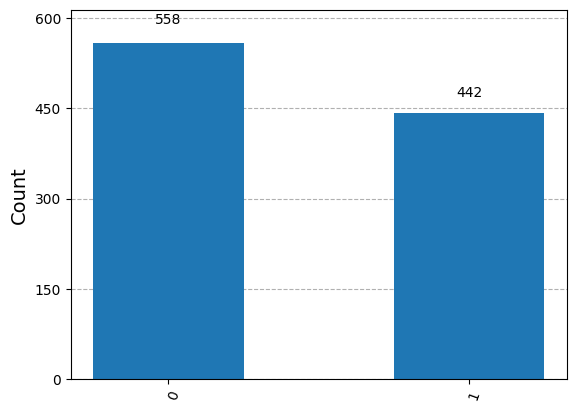

In [19]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [20]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

In [21]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [22]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

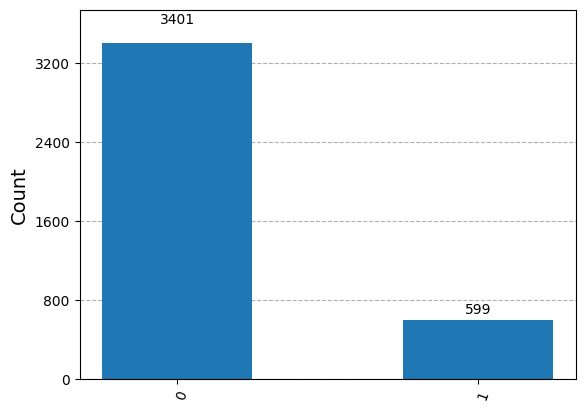

In [23]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)